<a href="https://colab.research.google.com/github/prikshit-2000/MNIST-CNN/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [39]:


mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()



In [40]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


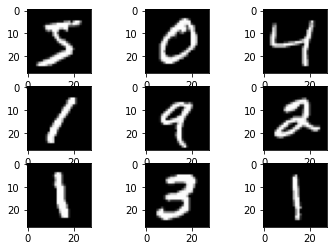

In [42]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

plt.show()

In [43]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.98):
                print("\nReached 98.0% accuracy so cancelling training!")
                self.model.stop_training = True


In [44]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [45]:
x_train=x_train/255.0
x_test=x_test/255.0

In [46]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')

    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=19,callbacks=[callbacks])
model.summary()

Epoch 1/19
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1255 - accuracy: 0.9616
Epoch 2/19
1874/1875 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9869
Reached 98.0% accuracy so cancelling training!
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0406 - accuracy: 0.9869
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
__________________________________________

In [64]:
pred=model.predict((x_test[:10]))
pred_label=np.argmax(pred,axis=1)
pred_label

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

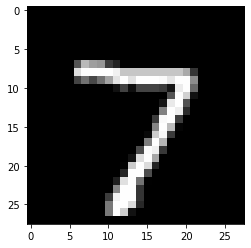

The image shows  7


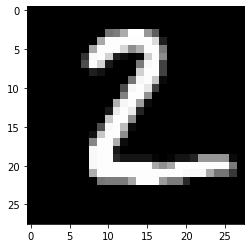

The image shows  2


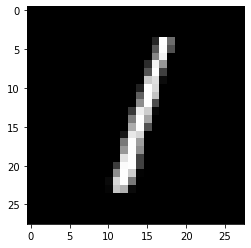

The image shows  1


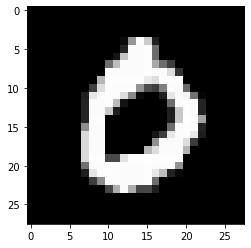

The image shows  0


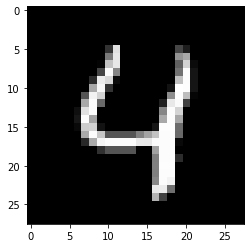

The image shows  4


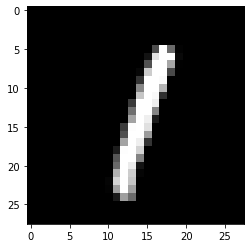

The image shows  1


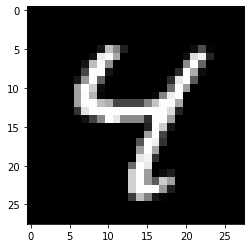

The image shows  4


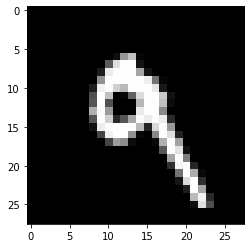

The image shows  9


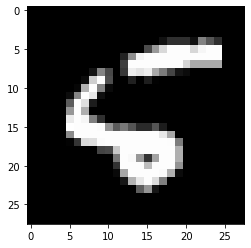

The image shows  5


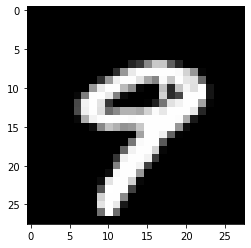

The image shows  9


In [65]:
test_images=x_test.reshape(10000,28,28)
for i in range(0,10):
  
  plt.imshow(test_images[i],cmap=plt.get_cmap('gray'))
  plt.show()
  print("The image shows ",pred_label[i])


In [66]:
model.evaluate(x_test,y_test)



313/313 [==============================] - 3s 10ms/step - loss: 0.0337 - accuracy: 0.9890


[0.033694468438625336, 0.9890000224113464]